In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/kaggle/input/adidas-us-sales-dataset/Adidas US Sales Datasets.xlsx")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [3]:
df.shape

(9648, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


## Data Cleaning and Preprocessing

In [5]:
df.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [6]:
# There are no Duplicates
df[df.duplicated()]

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method


In [7]:
# Dropping Retailer ID
df.drop(columns=['Retailer ID'],inplace=True)
df.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


## Business Problems (Solved using Pandas)

### Q1. Total Sales by Retailer

In [8]:
df.groupby('Retailer').agg(
    total_sales = ('Total Sales','sum')
).reset_index()

,Retailer,total_sales
0,Amazon,77698912.0
1,Foot Locker,220094720.0
2,Kohl's,102114753.0
3,Sports Direct,182470997.0
4,Walmart,74558410.0
5,West Gear,242964333.0


### Q2. Units Sold by Product

In [9]:
df.groupby('Product').agg(
    units_sold = ('Units Sold','sum')
).reset_index()

,Product,units_sold
0,Men's Apparel,306683
1,Men's Athletic Footwear,435526
2,Men's Street Footwear,593320
3,Women's Apparel,433827
4,Women's Athletic Footwear,317236
5,Women's Street Footwear,392269


### Q3. Sales by Region

In [10]:
df.groupby('Region').agg(
    sales_region = ('Total Sales','sum')
).reset_index()

,Region,sales_region
0,Midwest,135800459.0
1,Northeast,186324067.0
2,South,144663181.0
3,Southeast,163171236.0
4,West,269943182.0


In [11]:
df['Month'] = df['Invoice Date'].dt.to_period('M')
df.groupby('Month')['Total Sales'].sum().reset_index()

,Month,Total Sales
0,2020-01,16253746.0
1,2020-02,14997988.0
2,2020-03,17660577.0
3,2020-04,24607006.0
4,2020-05,16918014.0
5,2020-06,8829819.0
6,2020-07,17146013.0
7,2020-08,19877980.0
8,2020-09,18304436.0
9,2020-10,10836269.0


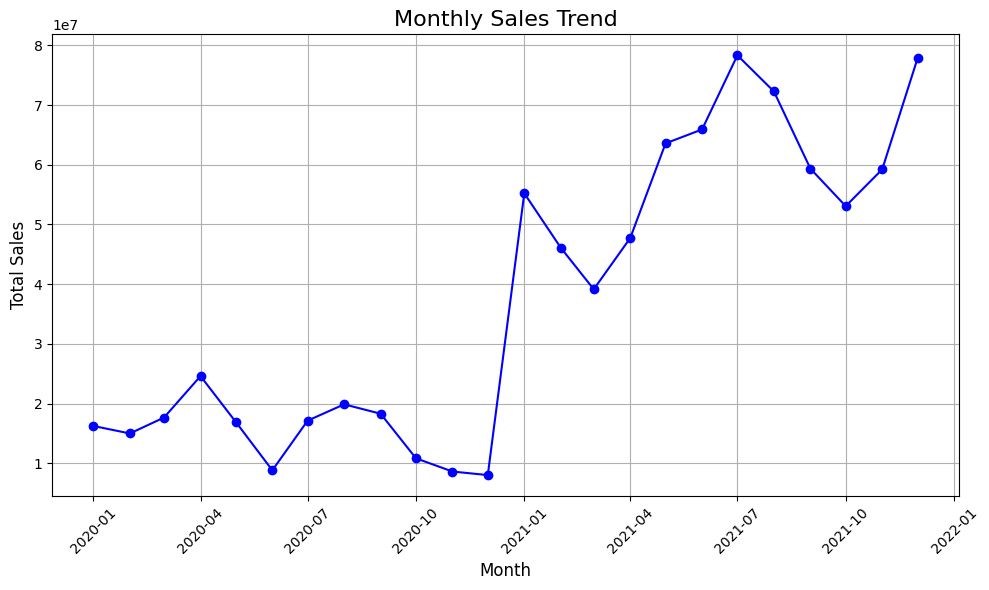

In [12]:
import matplotlib.pyplot as plt

# Grouping the data by Month and summing Total Sales
monthly_sales = df.groupby('Month')['Total Sales'].sum().reset_index()

# Converting Month to a datetime object for proper plotting
monthly_sales['Month'] = monthly_sales['Month'].astype(str)
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Q5. Profitability by Product

In [13]:
df.groupby('Product').agg(
    profit = ('Operating Profit','sum')
).reset_index()

,Product,profit
0,Men's Apparel,44763030.33
1,Men's Athletic Footwear,51846888.19
2,Men's Street Footwear,82802260.62
3,Women's Apparel,68650970.56
4,Women's Athletic Footwear,38975784.94
5,Women's Street Footwear,45095826.81


### Q6. Top-Selling Products in Each Region

In [14]:
df.groupby(['Region', 'Product']).agg(
    units_sold = ('Units Sold','sum')
).reset_index()\
.sort_values(['Region', 'units_sold'], ascending=[True, False])\
.groupby('Region').head(3) # Groups the sorted data again by Region to allow selecting the top rows for each region.

,Region,Product,units_sold
2,Midwest,Men's Street Footwear,109861
3,Midwest,Women's Apparel,69435
1,Midwest,Men's Athletic Footwear,65120
8,Northeast,Men's Street Footwear,134252
9,Northeast,Women's Apparel,90048
7,Northeast,Men's Athletic Footwear,81474
14,South,Men's Street Footwear,106545
13,South,Men's Athletic Footwear,90079
15,South,Women's Apparel,88740
20,Southeast,Men's Street Footwear,91867


### Q7. City-Wise Sales Breakdown (Top 10)

In [15]:
df.groupby('City').agg(
    total_sales = ('Total Sales','sum')
).reset_index()\
.sort_values(['City', 'total_sales'], ascending=[True, False]).head(10)

,City,total_sales
0,Albany,24427804.0
1,Albuquerque,19865016.0
2,Anchorage,14753103.0
3,Atlanta,18997466.0
4,Baltimore,7758059.0
5,Billings,15710886.0
6,Birmingham,17633424.0
7,Boise,19276878.0
8,Boston,11076810.0
9,Burlington,14352923.0


 ### Q8. Sales Method Comparison

In [16]:
df.groupby('Sales Method').agg({'Total Sales': 'sum', 'Operating Margin': 'mean'}).reset_index()

,Sales Method,Total Sales,Operating Margin
0,In-store,356643750.0,0.356121
1,Online,247672882.0,0.464152
2,Outlet,295585493.0,0.394876


### Q9. Seasonality Analysis

In [17]:
df['Quarter'] = df['Invoice Date'].dt.quarter
df.groupby('Quarter').agg({'Total Sales': 'sum', 'Operating Margin': 'mean'}).reset_index()

,Quarter,Total Sales,Operating Margin
0,1,189388404.0,0.414170
1,2,227595037.0,0.424272
2,3,265308354.0,0.431322
3,4,217610330.0,0.422162


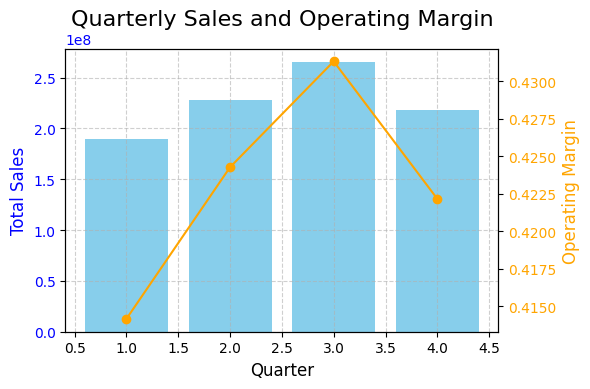

In [18]:
import matplotlib.pyplot as plt

# Grouping data by Quarter and calculating total sales and average operating margin
quarterly_data = df.groupby('Quarter').agg({
    'Total Sales': 'sum',
    'Operating Margin': 'mean'
}).reset_index()

# Plotting the data
fig, ax1 = plt.subplots(figsize=(6, 4))

# Plot Total Sales as a bar plot
ax1.bar(quarterly_data['Quarter'], quarterly_data['Total Sales'], color='skyblue', label='Total Sales')
ax1.set_xlabel('Quarter', fontsize=12)
ax1.set_ylabel('Total Sales', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Quarterly Sales and Operating Margin', fontsize=16)

# Create a second y-axis for Operating Margin
ax2 = ax1.twinx()
ax2.plot(quarterly_data['Quarter'], quarterly_data['Operating Margin'], color='orange', marker='o', label='Operating Margin')
ax2.set_ylabel('Operating Margin', fontsize=12, color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding a grid and legend
fig.tight_layout()
ax1.grid(visible=True, linestyle='--', alpha=0.6)

### Q10. Profitability Hotspots (Top 10)
- **Query:** Which combination of state and product has the highest average operating margin?
- **Purpose:** Find areas with high profitability potential.

In [19]:
df.groupby(['State', 'Product'])['Operating Margin'].mean().reset_index() \
  .sort_values('Operating Margin', ascending=False).head(10)

,State,Product,Operating Margin
3,Alabama,Women's Apparel,0.678889
150,Montana,Men's Apparel,0.664583
249,Tennessee,Women's Apparel,0.622778
30,Colorado,Men's Apparel,0.618333
129,Michigan,Women's Apparel,0.610000
4,Alabama,Women's Athletic Footwear,0.609444
162,Nevada,Men's Apparel,0.598333
24,California,Men's Apparel,0.578056
250,Tennessee,Women's Athletic Footwear,0.573056
224,Pennsylvania,Men's Street Footwear,0.572222


## Prepare Data for ML/DL Models

In [20]:
df.head()

,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month,Quarter
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,2020-01,1
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,2020-01,1
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,2020-01,1
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,2020-01,1
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,2020-01,1


In [21]:
df.drop(columns=['Invoice Date','Month','Quarter'],inplace=True)
df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [22]:
print("Unique Elements in Retailer =>",df['Retailer'].unique())
print("\nUnique Elements in Region =>",df['Region'].unique())
print("\nUnique Elements in State =>",df['State'].unique())
print("\nUnique Elements in Product =>",df['Product'].unique())
print("\nUnique Elements in Sales Method =>",df['Sales Method'].unique())

Unique Elements in Retailer => ['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']

Unique Elements in Region => ['Northeast' 'South' 'West' 'Midwest' 'Southeast']

Unique Elements in State => ['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']

Unique Elements in Product => ["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]

Unique Elements in Sales Method

### Encoding Categorical Variables

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Columns to encode
categorical_columns = ['Retailer', 'Region', 'State', 'City', 'Product', 'Sales Method']

# Apply label encoding
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1,1,31,35,2,50.0,1200,600000.0,300000.0,0.50,0
1,1,1,31,35,1,50.0,1000,500000.0,150000.0,0.30,0
2,1,1,31,35,5,40.0,1000,400000.0,140000.0,0.35,0
3,1,1,31,35,4,45.0,850,382500.0,133875.0,0.35,0
4,1,1,31,35,0,60.0,900,540000.0,162000.0,0.30,0


## Total Sales Prediction (Regression Model)

In [24]:
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import  log_loss

from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [25]:
df1 = df.copy()
df1.head()

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,1,1,31,35,2,50.0,1200,600000.0,300000.0,0.50,0
1,1,1,31,35,1,50.0,1000,500000.0,150000.0,0.30,0
2,1,1,31,35,5,40.0,1000,400000.0,140000.0,0.35,0
3,1,1,31,35,4,45.0,850,382500.0,133875.0,0.35,0
4,1,1,31,35,0,60.0,900,540000.0,162000.0,0.30,0


In [26]:
X = df1.drop(columns=['Total Sales'])
y = df1['Total Sales']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head(3)

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Operating Profit,Operating Margin,Sales Method
3542,3,1,6,20,3,40.0,275,38500.0,0.35,0
3400,1,1,7,51,1,50.0,275,48125.0,0.35,0
30,1,1,31,35,2,60.0,1250,375000.0,0.50,2


In [28]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

pt = PowerTransformer()
X_train_tf = pt.fit_transform(X_train)
X_test_tf = pt.transform(X_test)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


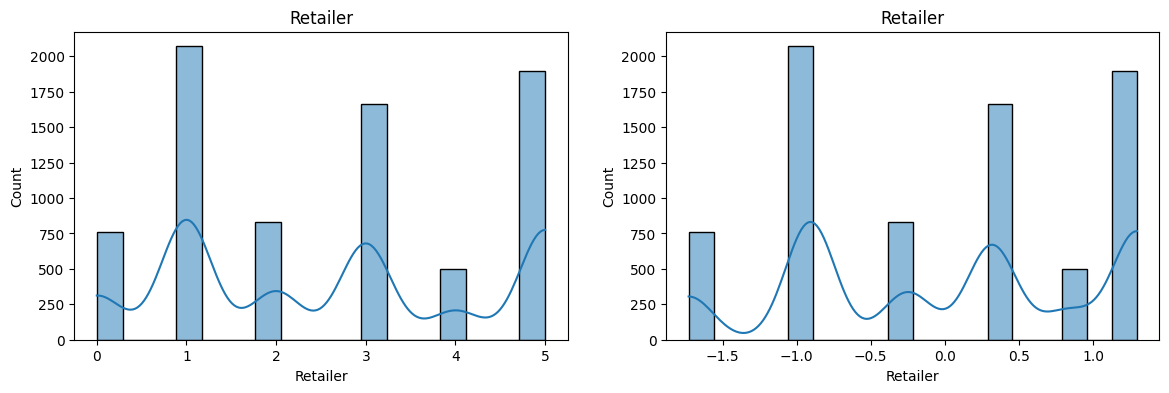

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


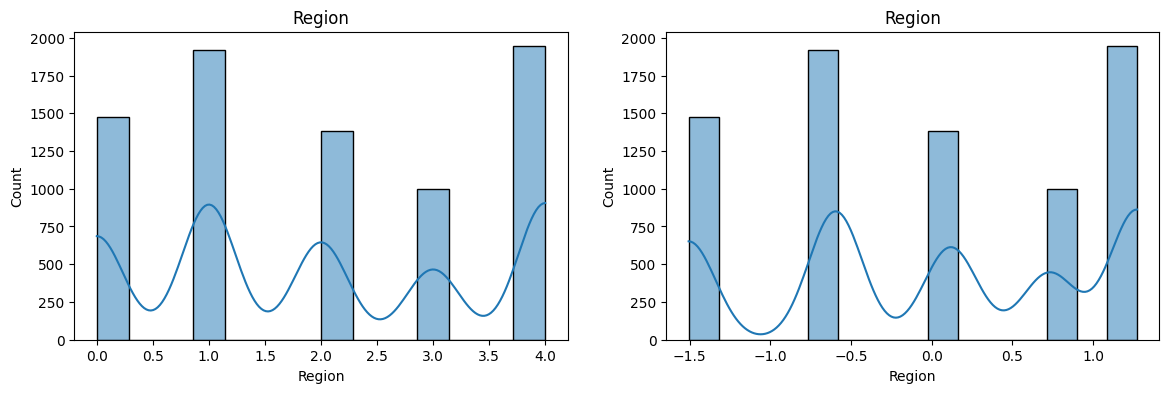

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


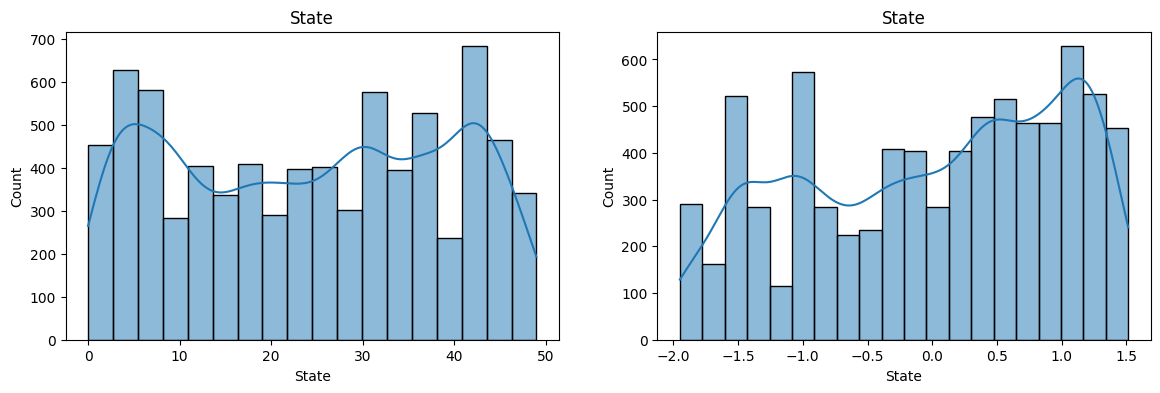

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


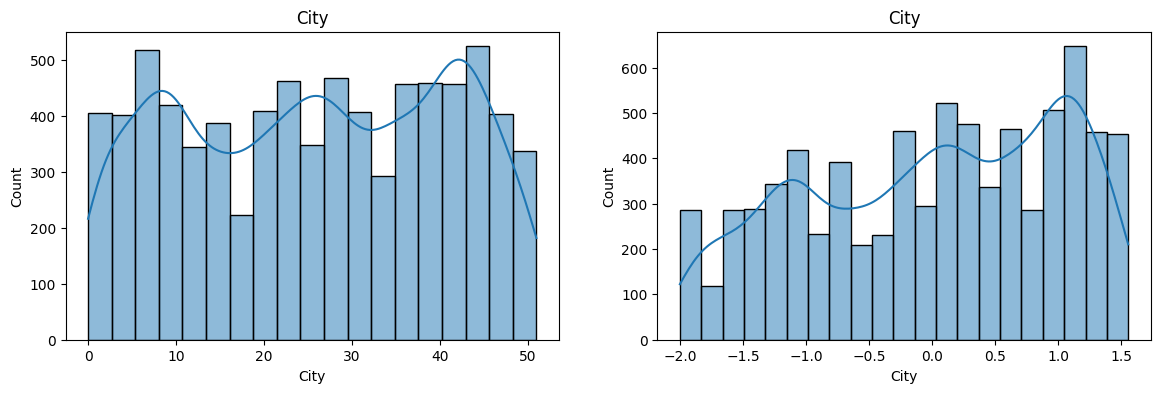

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


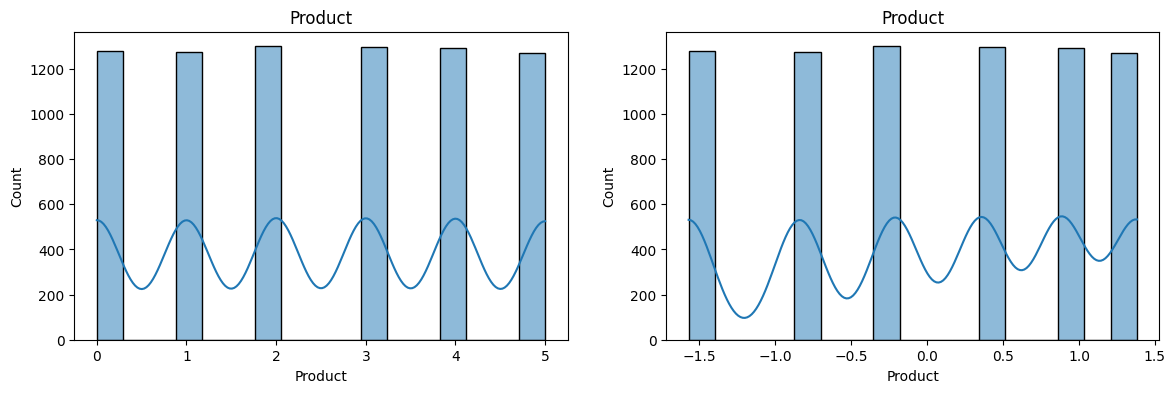

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


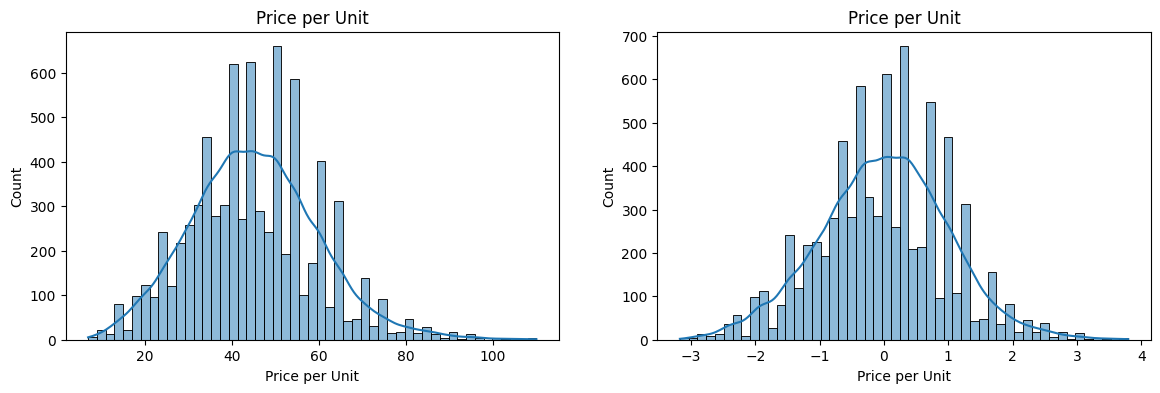

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


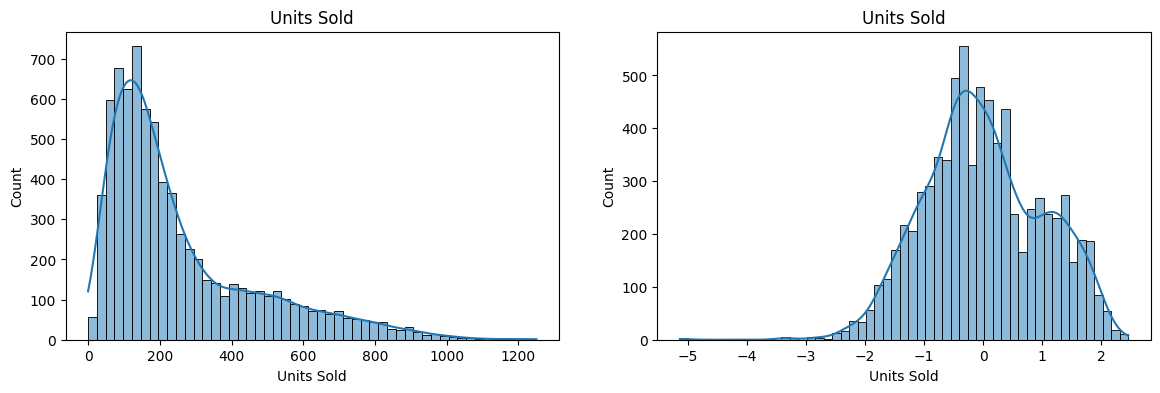

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


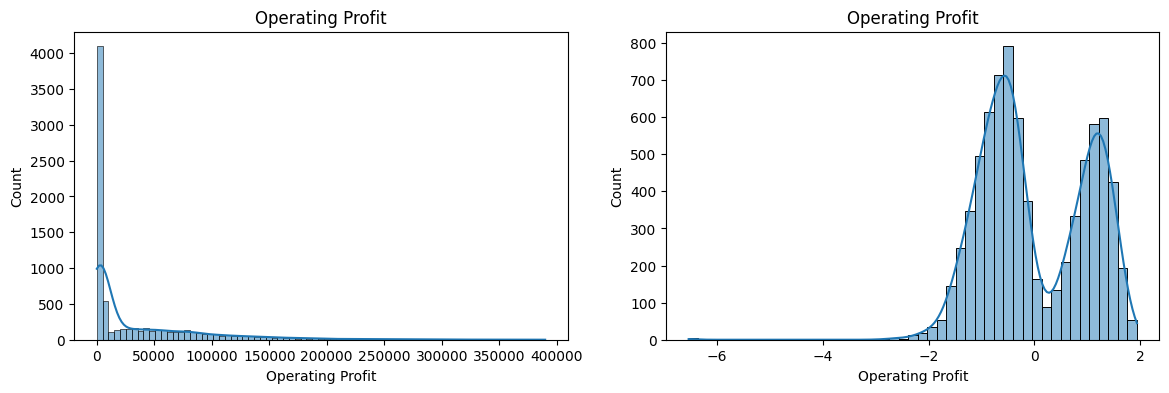

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


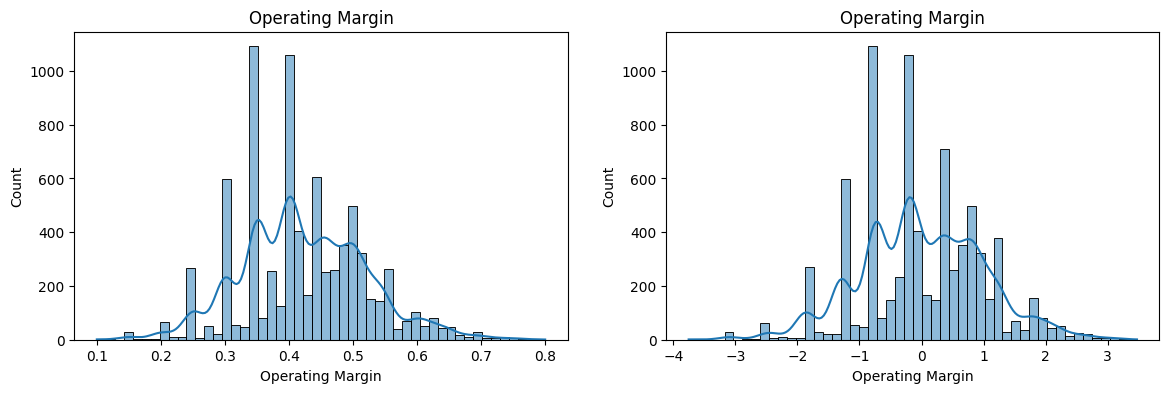

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


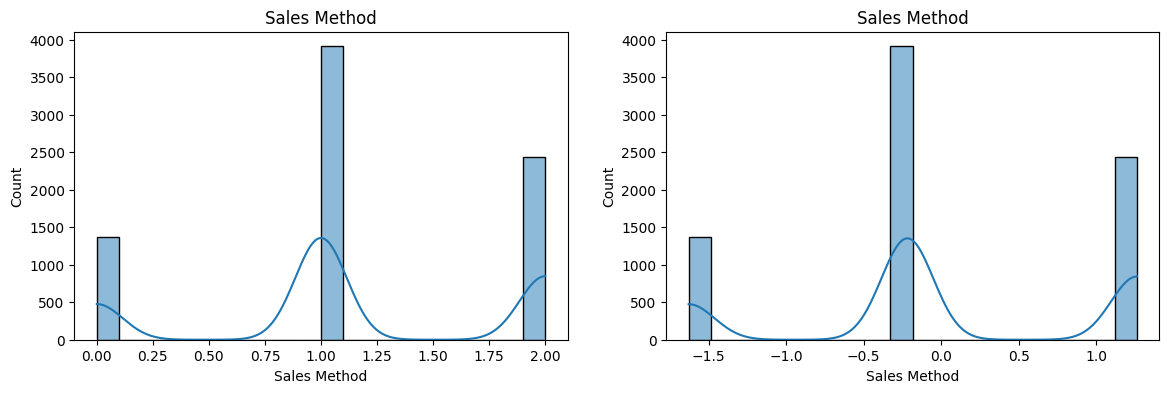

In [29]:
# Before and after comparision for Yeo-Johnson
X_train_tf = pd.DataFrame(X_train_tf,columns=X_train.columns)

for col in X_train_tf.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_tf[col],kde=True)
    plt.title(col)

    plt.show()

In [30]:
X_train_tf

,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Operating Profit,Operating Margin,Sales Method
0,0.317142,-0.596042,-1.259686,-0.297704,0.355835,-0.311214,0.443757,0.862367,-0.739777,-1.629044
1,-0.907352,-0.596042,-1.168378,1.557407,-0.839922,0.368996,0.443757,0.972998,-0.739777,-1.629044
2,-0.907352,-0.596042,0.516048,0.650549,-0.212522,1.006989,2.457253,1.923333,0.805492,1.264031
3,-1.728671,0.728709,-0.455613,0.285909,-0.212522,0.236693,-0.396778,-0.428733,1.095579,-0.217749
4,1.295823,0.118131,0.749891,0.768664,-0.212522,-1.868088,-0.121173,-0.879408,0.509430,1.264031
...,...,...,...,...,...,...,...,...,...,...
7713,1.295823,1.272253,1.195872,1.226759,-0.839922,-1.956423,-0.759429,-1.209890,0.805492,-0.217749
7714,-0.907352,1.272253,-0.912567,-0.230175,-1.570925,0.692618,-1.863063,-1.599745,-1.753351,-0.217749
7715,-0.250910,-0.596042,0.516048,-2.000508,0.355835,1.552602,-0.060491,0.041889,2.111763,-0.217749
7716,-0.250910,-1.506614,-0.044918,0.530802,-0.212522,-0.671333,1.140287,1.187353,0.308615,1.264031


### Linear Regression

In [31]:
lr = LinearRegression()
lr.fit(X_train_tf,y_train)

y_pred = lr.predict(X_test_tf)

r2 = r2_score(y_test,y_pred)
r2

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.7226642999514159

### Xgboost Regressor

In [32]:
xgb_model = XGBRegressor()

xgb_model.fit(X_train_tf,y_train)

y_pred_xg = xgb_model.predict(X_test_tf)

print("R2 Score => ",r2_score(y_test,y_pred_xg))

R2 Score =>  0.99910576452601


### LGBM Regressor

In [33]:
lgbm_model = LGBMRegressor()

lgbm_model.fit(X_train_tf,y_train)

y_pred_lg = lgbm_model.predict(X_test_tf)

print("R2 Score => ",r2_score(y_test,y_pred_lg))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 7718, number of used features: 10
[LightGBM] [Info] Start training from score 93351.135786
R2 Score =>  0.9992281989636126


### Gradient Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

GB = GradientBoostingRegressor()
GB.fit(X_train_tf,y_train)

y_pred_gb = GB.predict(X_test_tf)

r2_score(y_test,y_pred_gb)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


0.9983989141985972

In [35]:
from sklearn.ensemble import StackingRegressor

# Create base models
base_models = [
    ("lgbm", lgbm_model),
    ("xgb", xgb_model)
]

# Create the stacking regressor
stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Fit the stacking regressor to the entire training set
stacking_regressor.fit(X_train_tf, y_train)

# Make predictions on new data
y_pred_stacked = stacking_regressor.predict(X_test_tf)
r2_score(y_test,y_pred_stacked)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 795
[LightGBM] [Info] Number of data points in the train set: 7718, number of used features: 10
[LightGBM] [Info] Start training from score 93351.135786
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 787
[LightGBM] [Info] Number of data points in the train set: 6174, number of used features: 10
[LightGBM] [Info] Start training from score 92967.115970
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead o

0.9994179762267819

## Unified Pipeline
- Implement all preprocessing, model training, and prediction steps in a single pipeline for efficient and consistent handling of data transformations and predictions. This ensures seamless model evaluation, prediction and deployment.


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# Define the dataset
df1 = df.copy()
df1.dropna(inplace=True)

# Define the features (X) and target (y)
X = df1.drop(columns=['Total Sales'])  # Features
y = df1['Total Sales']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical and categorical columns
numerical_cols = ['Price per Unit', 'Units Sold', 'Operating Profit', 'Operating Margin']
categorical_cols = ['Region', 'State', 'City', 'Product', 'Sales Method']

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('power_transformer', PowerTransformer()),  # Apply PowerTransformer
            ('scaler', StandardScaler())  # Scale numerical features
        ]), numerical_cols),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
        ]), categorical_cols)
    ]
)

# Define base models for stacking
lgbm_model = LGBMRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42)

# Create stacking regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('lgbm', lgbm_model),
        ('xgb', xgb_model)
    ],
    final_estimator=LinearRegression()
)

# Build the unified pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Preprocessing pipeline
    ('stacking', stacking_regressor)  # Stacking regressor
])

# Train the unified pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model using R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 899
[LightGBM] [Info] Number of data points in the train set: 7718, number of used features: 120
[LightGBM] [Info] Start training from score 93351.135786
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000328 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 891
[LightGBM] [Info] Number of data points in the train set: 6174, number of used features: 120
[LightGBM] [Info] Start training from score 92967.115970
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 6174, number of used features: 120
[LightGBM] [Info] Star

## Testing our Model
- **Region**: Northeast
- **State**: New York
- **City**: New York
- **Product**: Men's Street Footwear
- **Price per Unit**: 50.0
- **Units Sold**: 1200
- **Operating Profit**: 300000.0
- **Operating Margin**: 0.50
- **Sales Method**: In-store

- **Actual Total Sales:** 600000.0

In [37]:
# New data for prediction
new_data = pd.DataFrame({
    'Region': ['Northeast'],
    'State': ['New York'],
    'City': ['New York'],
    'Product': ['Men\'s Street Footwear'],
    'Price per Unit': [50.0],
    'Units Sold': [1200],
    'Operating Profit': [300000.0],
    'Operating Margin': [0.50],
    'Sales Method': ['In-store']
})

# Step 1: Use the pipeline to make predictions
predictions = pipeline.predict(new_data)

predictions_rounded = [round(pred, 2) for pred in predictions]
print("Predicted Total Sales:", predictions_rounded)


Predicted Total Sales: [607471.61]
